<a href="https://colab.research.google.com/github/venkateshakula77/IT7103/blob/main/IT7103__A5__Regression_Pavan_Veera_Venkatesh_Akula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IT7103 - Assignment 5 - Regression
#1 - Import the Data and Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is available as a CSV file
data = pd.read_csv('real_estate_value.csv')

#2 - Split the Data into Training and Testing Sets

In [2]:
# Define features and target
X = data[['HouseAge', 'DistanceToMRT', 'NoOfStores', 'Latitude', 'Longitude']]
y = data['UnitPrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3 - Examine the Data and Preprocessing Steps

   HouseAge  DistanceToMRT  NoOfStores  Latitude  Longitude  UnitPrice
0      32.0       84.87882          10  24.98298  121.54024       37.9
1      19.5      306.59470           9  24.98034  121.53951       42.2
2      13.3      561.98450           5  24.98746  121.54391       47.3
3      13.3      561.98450           5  24.98746  121.54391       54.8
4       5.0      390.56840           5  24.97937  121.54245       43.1
         HouseAge  DistanceToMRT  NoOfStores    Latitude   Longitude  \
count  414.000000     414.000000  414.000000  414.000000  414.000000   
mean    17.712560    1083.885689    4.094203   24.969030  121.533361   
std     11.392485    1262.109595    2.945562    0.012410    0.015347   
min      0.000000      23.382840    0.000000   24.932070  121.473530   
25%      9.025000     289.324800    1.000000   24.963000  121.528085   
50%     16.100000     492.231300    4.000000   24.971100  121.538630   
75%     28.150000    1454.279000    6.000000   24.977455  121.543305  

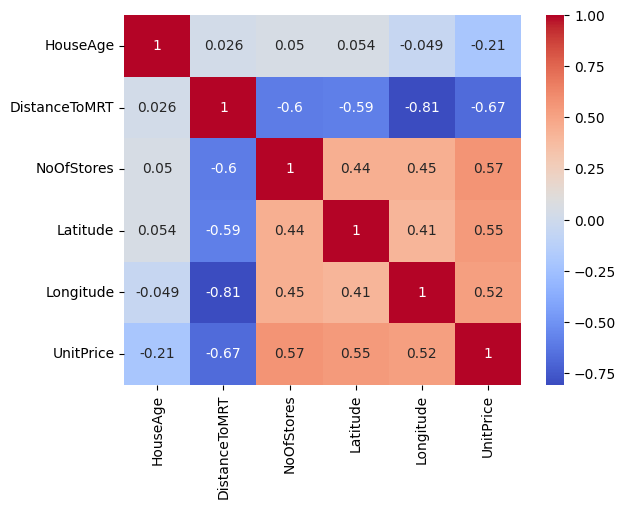

In [3]:
# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Justification for Preprocessing Steps:
1. Missing Values: Check if there are any missing values in the
dataset. If any, decide on imputation strategy or removal.
Feature
2. Scaling: Features like DistanceToMRT may have larger ranges compared to others. Standard scaling can help in normalizing the features.
Outlier
3. Detection: Visualize the data to detect outliers, which can affect the model performance.

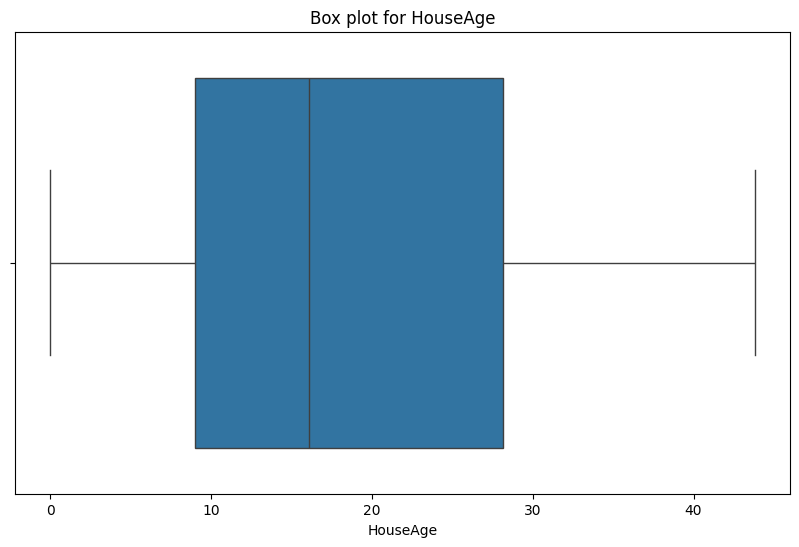

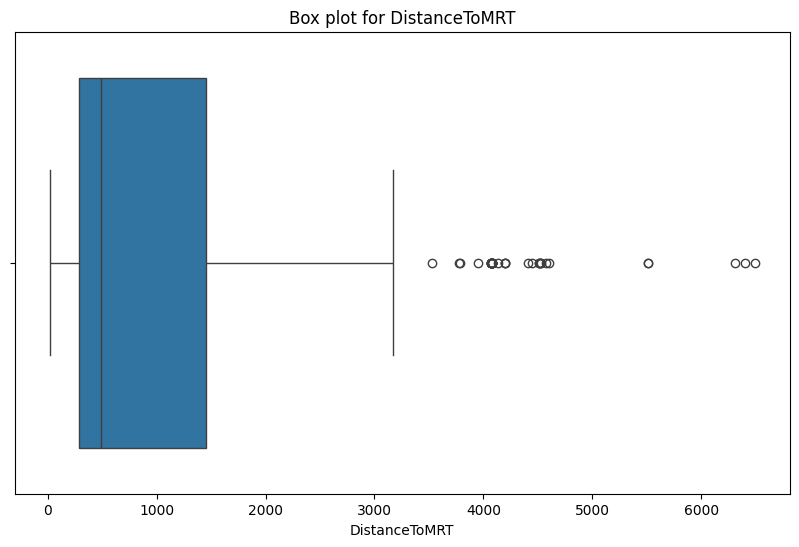

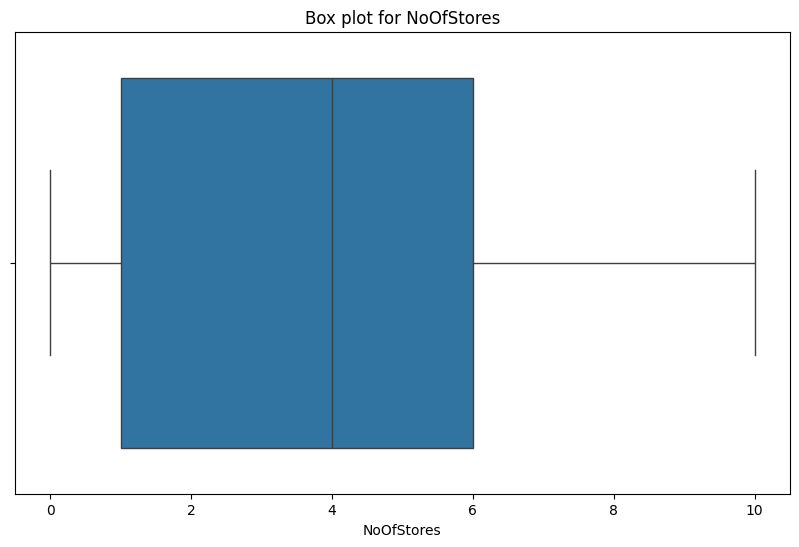

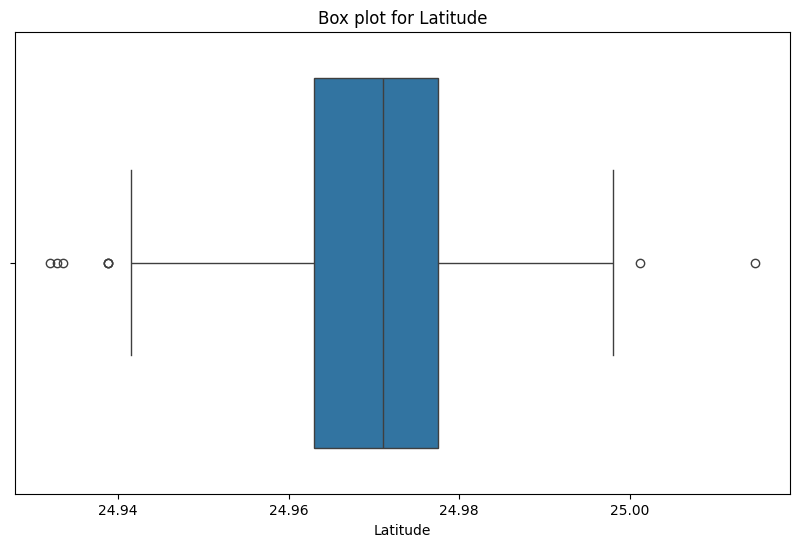

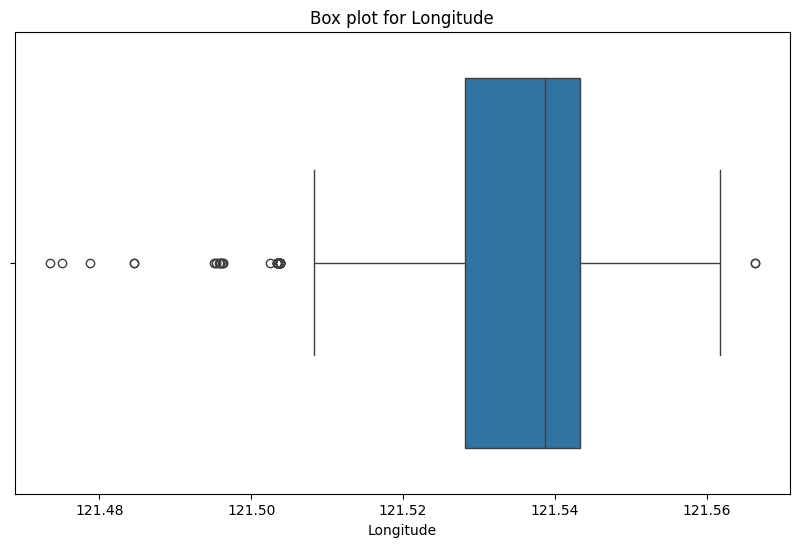

In [4]:
# Check for outliers using box plots
features = ['HouseAge', 'DistanceToMRT', 'NoOfStores', 'Latitude', 'Longitude']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot for {feature}')
    plt.show()

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#4 - Fine-tune Decision Tree and Random Forest

In [5]:
# Initialize models
dt_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)

# Train models
dt_regressor.fit(X_train_scaled, y_train)
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_regressor.predict(X_test_scaled)
y_pred_rf = rf_regressor.predict(X_test_scaled)

# Evaluate performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Decision Tree - MSE: {mse_dt}, R2: {r2_dt}')
print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')


Decision Tree - MSE: 58.462168674698795, R2: 0.6515125315558523
Random Forest - MSE: 34.63745818539293, R2: 0.7935293816496486


#5 - Report Performance
The performance of the models is reported using Mean Squared Error (MSE) and R-squared (R²) metrics.

#6 - Fine-tuning Hyperparameters

In [6]:
from sklearn.model_selection import GridSearchCV

# Decision Tree hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search_dt = GridSearchCV(estimator=dt_regressor, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train_scaled, y_train)

# Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and evaluation
best_dt = grid_search_dt.best_estimator_
best_rf = grid_search_rf.best_estimator_

y_pred_best_dt = best_dt.predict(X_test_scaled)
y_pred_best_rf = best_rf.predict(X_test_scaled)

mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Best Decision Tree - MSE: {mse_best_dt}, R2: {r2_best_dt}')
print(f'Best Random Forest - MSE: {mse_best_rf}, R2: {r2_best_rf}')


Best Decision Tree - MSE: 49.465806288370004, R2: 0.7051389984538325
Best Random Forest - MSE: 33.899581629900595, R2: 0.797927794138905
